In [1]:
import pandas as pd
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt

import phik
from pandas_profiling import ProfileReport


pd.set_option("display.precision", 2)      # Display 2 decimals
pd.set_option('display.max_columns', 1000) # Display all variables

In this competition, you will be predicting the probability `[0, 1]` of a binary target column.

The data contains only categorical features:
- binary features (`bin_*`)
- nominal features (`nom_*`)
- ordinal features (`ord_*`)
- (potentially cyclical) day (of the week) and month features.
- The string ordinal features ord_{3-5} are lexically ordered according to string.ascii_letters.

Since the purpose of this competition is to explore various encoding strategies. Unlike the first Categorical Feature Encoding Challenge, the data for this challenge has missing values and feature intera

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,b574c9841,708248125,5ddc9a726,745b909d1,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,777d1ac2c,3a7975e46,bc9cc2a94,NaN,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [4]:
df = df.drop('id', 1)

In [5]:
len(df)

600000

# Missings

In [6]:
# Option 1: Pandas
def check_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent missing']).T

missings = check_missing(df)
missings

,ord_0,nom_0,nom_1,nom_6,nom_3,ord_2,nom_9,bin_4,ord_1,nom_4,nom_2,bin_3,bin_1,nom_7,month,day,ord_4,bin_2,ord_3,bin_0,nom_5,nom_8,ord_5,target
Total,18288.00,18252.00,18156.00,18131.00,18121.00,18075.00,18073.00,18047.00,18041.00,18035.00,18035.00,18014.0,18003.0,18003.0,17988.0,17952.00,17930.00,17930.00,17916.00,17894.00,17778.00,17755.00,17713.00,0.0
Percent missing,3.05,3.04,3.03,3.02,3.02,3.01,3.01,3.01,3.01,3.01,3.01,3.0,3.0,3.0,3.0,2.99,2.99,2.99,2.99,2.98,2.96,2.96,2.95,0.0


#### Conclusión: No hay muchos, el que más un 3%

# Unique values

In [7]:
uniques     = df.nunique()
uniques_per = df.nunique()

In [8]:
df.describe(include=['object', 'bool'])

,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_1,ord_2,ord_3,ord_4,ord_5
count,581986,581953,581748,581844,581965,581879,581965,582222,581869,581997,582245,581927,581959,581925,582084,582070,582287
unique,2,2,3,6,6,6,4,1220,1519,222,222,2218,5,6,15,26,190
top,F,N,Red,Triangle,Hamster,India,Theremin,fc8fc7e56,ea8c5e181,4ae48e857,7d7c02c57,8f3276a6e,Novice,Freezing,n,N,Fl
freq,366212,312344,323286,164190,164897,164869,308621,977,805,5035,5052,565,160597,142726,70982,39978,10562


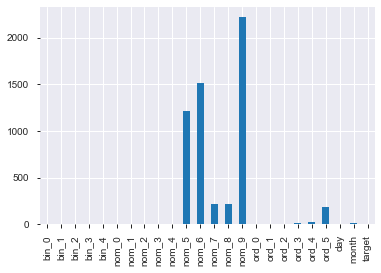

In [9]:
df.nunique().plot.bar();

#### Conclusión: Algunas variables tienen muchos valores distintos

# <center> Univariate analysis

## Binary Features

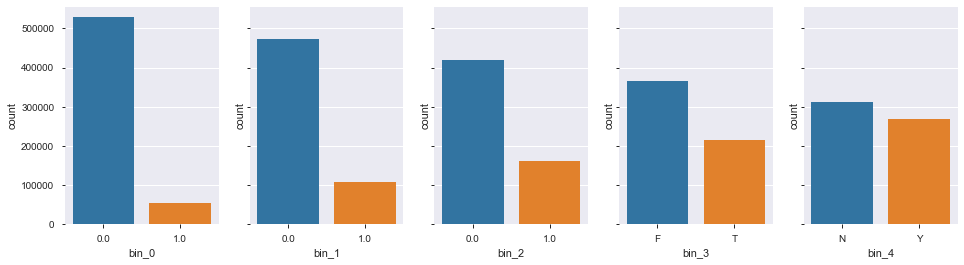

In [10]:
f, a = plt.subplots(nrows=1, ncols=5, figsize=(16, 4), sharey=True)

sns.countplot(x='bin_0', data=df, ax=a[0]);
sns.countplot(x='bin_1', data=df, ax=a[1]);
sns.countplot(x='bin_2', data=df, ax=a[2]);
sns.countplot(x='bin_3', data=df, ax=a[3]);
sns.countplot(x='bin_4', data=df, ax=a[4]);

## Nominal Features (few categories)

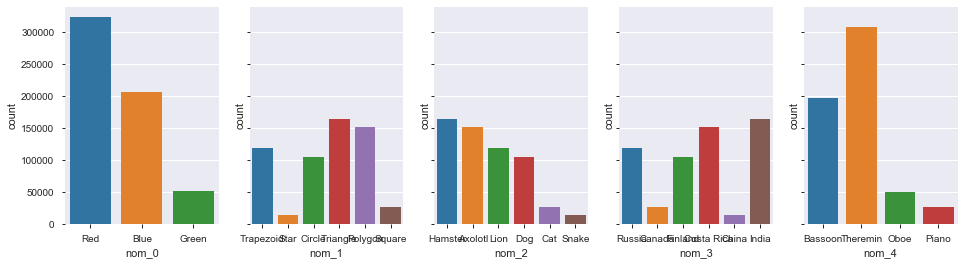

In [11]:
f, a = plt.subplots(nrows=1, ncols=5, figsize=(16, 4), sharey=True)

sns.countplot(x='nom_0', data=df, ax=a[0]);
sns.countplot(x='nom_1', data=df, ax=a[1]);
sns.countplot(x='nom_2', data=df, ax=a[2]);
sns.countplot(x='nom_3', data=df, ax=a[3]);
sns.countplot(x='nom_4', data=df, ax=a[4]);

## Nominal Features (lots categories)

In [12]:
pd.DataFrame({  'Recuento':   df.nom_5.value_counts(),
                'Porcentaje': df.nom_5.value_counts(normalize=True) * 100
             }).head()

,Recuento,Porcentaje
fc8fc7e56,977,0.17
360a16627,972,0.17
423976253,961,0.17
7917d446c,961,0.17
079b76328,960,0.16


## Ordinal Features (few categories)

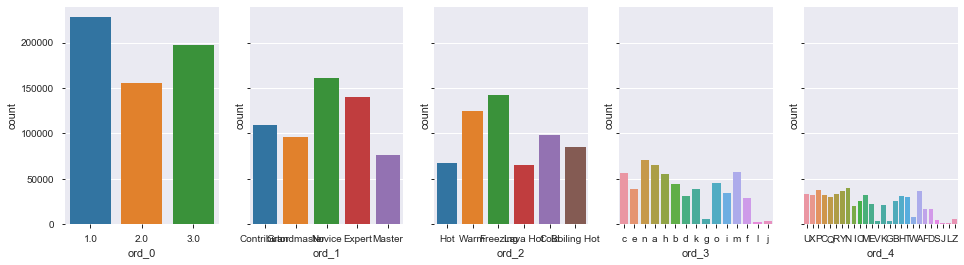

In [13]:
f, a = plt.subplots(nrows=1, ncols=5, figsize=(16, 4), sharey=True)

sns.countplot(x='ord_0', data=df, ax=a[0]);
sns.countplot(x='ord_1', data=df, ax=a[1]);
sns.countplot(x='ord_2', data=df, ax=a[2]);
sns.countplot(x='ord_3', data=df, ax=a[3]);
sns.countplot(x='ord_4', data=df, ax=a[4]);

# Está balanceado?

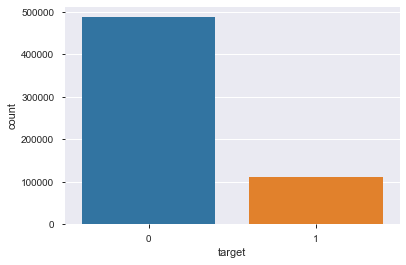

In [14]:
sns.countplot(x='target', data=df);

# Metrica de evaluación: Área bajo la curva

In [15]:
from sklearn.metrics import roc_auc_score
import numpy as np


y    = np.array([0, 0, 1, 1])
pred = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc_score(y, pred)

0.75